In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession

#create session
spark= SparkSession.builder.appName('IPL Data Analysis').getOrCreate()

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType,StringType,BooleanType, DecimalType, DateType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema= StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df= spark.read.schema(ball_by_ball_schema).format('csv').option('header','true').load('s3://ipl-data-analysis-project/Ball_By_Ball.csv')

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema= StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])



In [0]:
match_df= spark.read.schema(match_schema).format('csv').option('header','true').load('s3://ipl-data-analysis-project/Match.csv')

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])


In [0]:
player_df= spark.read.schema(player_schema).format('csv').option('header','true').load('s3://ipl-data-analysis-project/Player.csv')

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),  # Assuming the decimal has precision 10 and scale 2
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # YearType is not available in Spark, using IntegerType instead
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
player_match_df= spark.read.schema(player_match_schema).format('csv').option('header','true').load('s3://ipl-data-analysis-project/Player_match.csv')

player_match_df.select('age_as_on_match', 'batting_status', 'season_year').show()


+---------------+--------------+-----------+
|age_as_on_match|batting_status|season_year|
+---------------+--------------+-----------+
|           null|          null|       null|
|             35|          null|       2008|
|             30|          null|       2008|
|             20|          null|       2008|
|             33|          null|       2008|
|             25|          null|       2008|
|             32|          null|       2008|
|             31|          null|       2008|
|             31|          null|       2008|
|             22|          null|       2008|
|             30|          null|       2008|
|             38|          null|       2008|
|             36|          null|       2008|
|             27|          null|       2008|
|             34|          null|       2008|
|             31|          null|       2008|
|             28|          null|       2008|
|             24|          null|       2008|
|             27|          null|       2008|
|         

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

In [0]:
team_df= spark.read.schema(team_schema).format('csv').option('header','true').load('s3://ipl-data-analysis-project/Team.csv')

In [0]:
#filter to include only the valid deliveries (exclude the extras like wide and no balls)
ball_by_ball_df= ball_by_ball_df.filter((col('wides')== 0) & (col('noballs')==0) )

#calculate the total and average run scored in each match and inning
total_and_avg_runs= ball_by_ball_df.groupby('match_id','innings_no').agg(
    sum('runs_scored').alias('total_run'),
    avg('runs_scored').alias('average_run')
)

In [0]:
#window function- calculate running total of runs in each match for each over
windowSpec= Window.partitionBy('match_id','innings_no').orderBy('over_id')
ball_by_ball_df=ball_by_ball_df.withColumn(
    'running_total_run',
    sum('runs_scored').over(windowSpec)
)


In [0]:
#Conditional column: Flag for high impact balls (either wicket or more than 6 runs including extras)
ball_by_ball_df= ball_by_ball_df.withColumn(
    'high_impact_ball',
    when((col('runs_scored')+ col('extra_runs')>6) | (col('bowler_wicket')== True), True).otherwise(False)
)

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

In [0]:
#Extracting year, month details from the match table for more detailed time-based analysis
match_df= match_df.withColumn('Year', year('match_date'))
match_df= match_df.withColumn('Month', month('match_date'))
match_df= match_df.withColumn('Day', dayofmonth('match_date'))

#Categorizing win margins into high, medium and low
match_df=match_df.withColumn(
    'win_margin_category',
    when(col('win_margin')>= 100,'High')
    .when((col('win_margin') <100) & (col('win_margin')>= 50),'Medium')
    .otherwise('Low')
) 

#Analyze the impact of toss: Who wins the toss and match
match_df=match_df.withColumn(
    'toss_match_winner',
    when(col('toss_winner')== col('match_winner'),'Yes').otherwise ('No')
)

match_df.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|Year|Month| Day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|  

In [0]:
from pyspark.sql.functions import lower, regexp_replace

#Normalize and clean player name
player_df=player_df.withColumn('player_name', lower(regexp_replace('player_name','[^a-zA-Z0-9]','')))

#Handling missing values in 'batting_hand' and 'bowling_skill'
player_df=player_df.na.fill({'batting_hand':'Unknown','bowling_skill':'Unknown'})

#Categorizing players based on batting_hand
player_df=player_df.withColumn(
    'batting_style',
    when(col('batting_hand').contains('left'),'Left_handed').otherwise('Right_handed')
)

player_df.show()

+---------+---------+--------------+----+--------------+--------------------+------------+-------------+
|player_sk|player_id|   player_name| dob|  batting_hand|       bowling_skill|country_name|batting_style|
+---------+---------+--------------+----+--------------+--------------------+------------+-------------+
|        0|        1|     scganguly|null| Left-hand bat|    Right-arm medium|       India| Right_handed|
|        1|        2|    bbmccullum|null|Right-hand bat|    Right-arm medium| New Zealand| Right_handed|
|        2|        3|     rtponting|null|Right-hand bat|    Right-arm medium|   Australia| Right_handed|
|        3|        4|      djhussey|null|Right-hand bat|  Right-arm offbreak|   Australia| Right_handed|
|        4|        5|mohammadhafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan| Right_handed|
|        5|        6|       rdravid|null|Right-hand bat|  Right-arm offbreak|       India| Right_handed|
|        6|        7|       wjaffer|null|Right-hand bat

In [0]:
from pyspark.sql.functions import col, when, current_date, year, lit


# Add veteran_status column based on player age, handling nulls
player_match_df = player_match_df.withColumn(
    'veteran_status',
    when(col('age_as_on_match') >= 35, 'Veteran').otherwise('Non-Veteran')
)


# Calculate years since debut, handling nulls in season_year
player_match_df = player_match_df.withColumn(
    'year_since_debut',
    (year(current_date()) - col('season_year'))
)

# Show the resulting DataFrame
player_match_df.show(5)


+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|year_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-------

In [0]:
ball_by_ball_df.createOrReplaceTempView('ball_by_ball')
match_df.createOrReplaceTempView('match')
player_df.createOrReplaceTempView('player')
player_match_df.createOrReplaceTempView('player_match')
team_df.createOrReplaceTempView('team')

In [0]:
top_scoring_batsman_per_season= spark.sql('''
SELECT
p.player_name,
m.season_year, 
SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id= m.match_id
JOIN player_match pm ON m.match_id= pm.match_id AND b.striker= pm.player_id
JOIN player p ON p.player_id= pm.player_id
GROUP BY p.player_name, m.season_year 
ORDER BY m.season_year, total_runs DESC                                          
''')

In [0]:
top_scoring_batsman_per_season.show(5)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|     semarsh|       2008|       614|
|    ggambhir|       2008|       532|
|stjayasuriya|       2008|       508|
|    srwatson|       2008|       463|
|     gcsmith|       2008|       437|
+------------+-----------+----------+
only showing top 5 rows



In [0]:
economical_bowlers_powerplay= spark.sql('''
SELECT p.player_name,
ROUND(AVG(b.runs_scored),2) AS avg_runs_per_ball,
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b 
JOIN player_match pm ON b.match_id= pm.match_id AND b.bowler= pm.player_id
JOIN player p ON pm.player_id= p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >1
ORDER BY avg_runs_per_ball, total_wickets DESC
''')

economical_bowlers_powerplay.show(5)

+-----------+-----------------+-------------+
|player_name|avg_runs_per_ball|total_wickets|
+-----------+-----------------+-------------+
|  smharwood|             0.33|            0|
|  ankitsoni|              0.5|            0|
|   grnapier|              0.5|            0|
|  aveshkhan|              0.5|            0|
|    ajfinch|              0.5|            0|
+-----------+-----------------+-------------+
only showing top 5 rows



In [0]:
toss_impact_individual_matches= spark.sql('''
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner, 
CASE WHEN m.toss_winner= m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
''')
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins= spark.sql('''
SELECT p.player_name, ROUND(AVG(b.runs_scored),2) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id= pm.match_id AND b.striker= pm.player_id
JOIN player p ON pm.player_id= p.player_id
JOIN match m ON pm.match_id= m.match_id
WHERE m.match_winner= pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC 
''')

average_runs_in_wins.show()

+-------------+----------------+--------------+
|  player_name|avg_runs_in_wins|innings_played|
+-------------+----------------+--------------+
|   rashidkhan|             6.0|             1|
| shahidafridi|            3.33|             6|
|      anahmed|             3.0|             3|
|      babhatt|             3.0|             2|
|       snkhan|            2.58|            19|
|    spjackson|             2.4|             5|
| harmeetsingh|            2.33|             6|
|      umargul|            2.31|            13|
|    smpollock|             2.2|            15|
|       msgony|            2.14|            29|
|mjmcclenaghan|             2.0|            11|
|   dskulkarni|             2.0|             3|
|       prshah|             2.0|             4|
|     vrvsingh|             2.0|             2|
| shivamsharma|             2.0|             2|
|      rssodhi|             2.0|             2|
| crbrathwaite|            1.96|            28|
|     chmorris|            1.96|        

In [0]:
import matplotlib.pyplot as plt

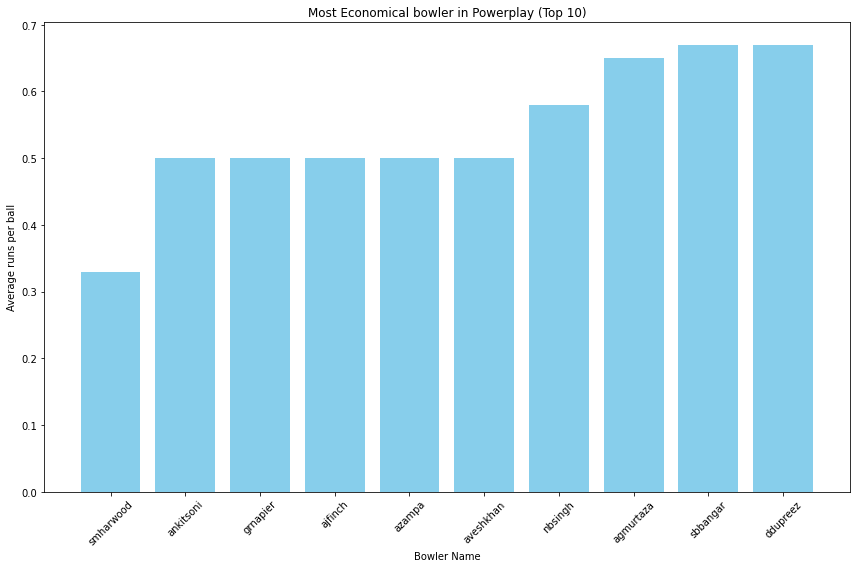

In [0]:
economical_bowlers_pd= economical_bowlers_powerplay.toPandas()

#Visualizing using Matplotlib
plt.figure(figsize=(12,8))
#Limiting to top 10 for clarity in the plot
top_economical_bowlers=economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'],top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average runs per ball')
plt.title('Most Economical bowler in Powerplay (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

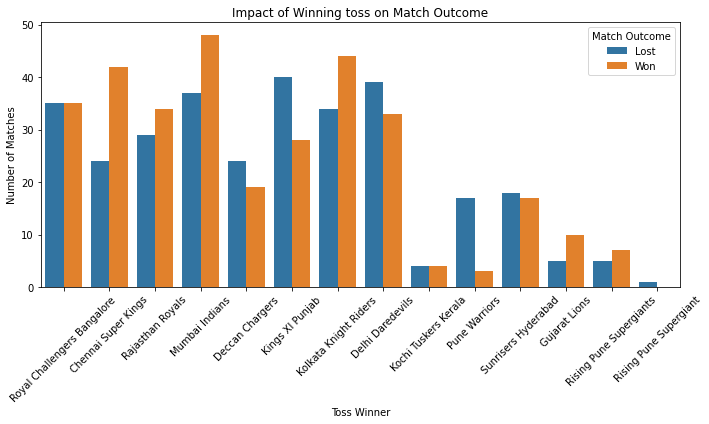

In [0]:
import seaborn as sns
toss_impact_pd= toss_impact_individual_matches.toPandas()

#Creating count plot to show win/loss after wining toss
plt.figure(figsize=(10,6))
sns.countplot(x= 'toss_winner', hue='match_outcome', data= toss_impact_pd)
plt.title('Impact of Winning toss on Match Outcome')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

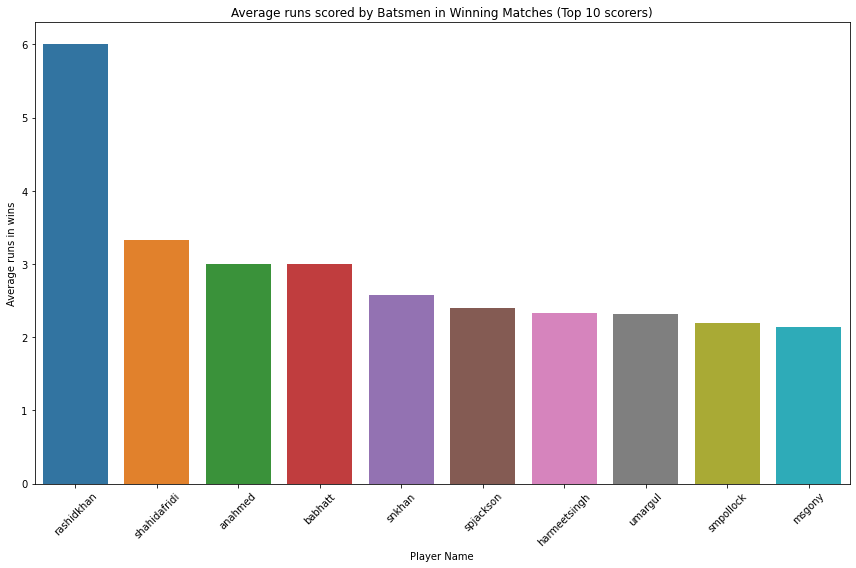

In [0]:
average_runs_pd= average_runs_in_wins.toPandas()

#Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12,8))
top_scorers= average_runs_pd.nlargest(10,'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average runs scored by Batsmen in Winning Matches (Top 10 scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average runs in wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
scores_by_venue= spark.sql('''
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
 FROM (
     SELECT b.match_id, m.venue_name, SUM(runs_scored) AS total_runs
     FROM ball_by_ball b 
     JOIN match m ON b.match_id= m.match_id
     GROUP BY b.match_id, m.venue_name
      )
      GROUP BY venue_name
      ORDER BY average_score DESC
''')

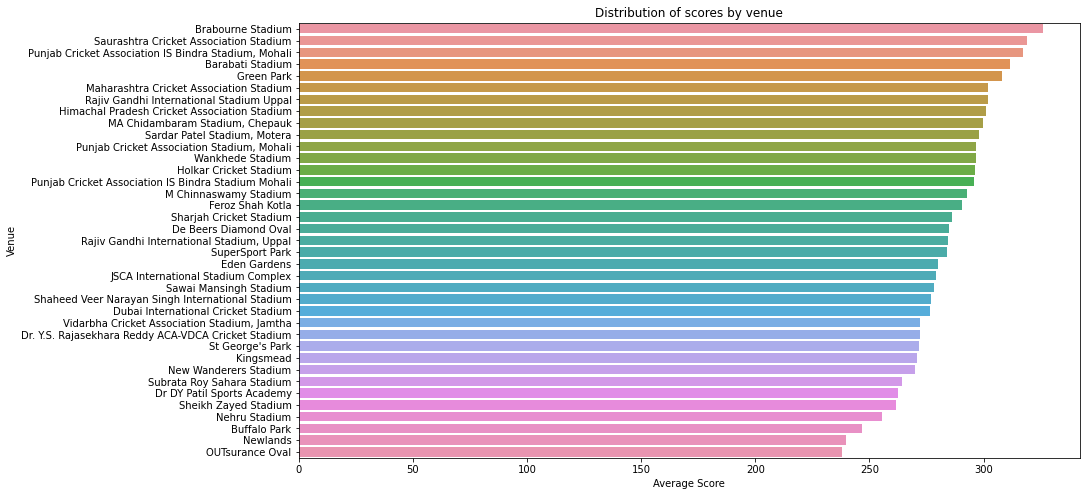

In [0]:
scores_by_venue_pd= scores_by_venue.toPandas()

#Plot
plt.figure(figsize=(14,8))
sns.barplot(x='average_score', y='venue_name', data= scores_by_venue_pd)
plt.title('Distribution of scores by venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
dismissal_types=spark.sql('''
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
''')

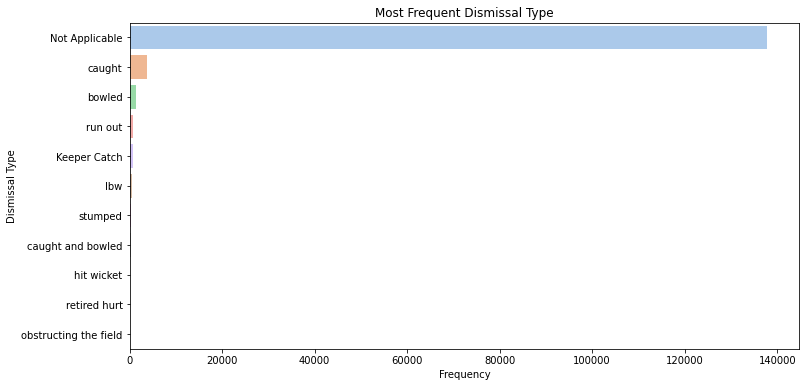

In [0]:
dismissal_types_pd= dismissal_types.toPandas()

#Plot
plt.figure(figsize=(12,6))
sns.barplot(x='frequency', y='out_type', data= dismissal_types_pd, palette= 'pastel')
plt.title('Most Frequent Dismissal Type')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [0]:
team_toss_win_performance= spark.sql('''
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner= match_winner THEN 1 ELSE 0 END) wins_after_toss
FROM match
WHERE toss_winner= team1
GROUP BY team1 
ORDER BY wins_after_toss DESC
''')

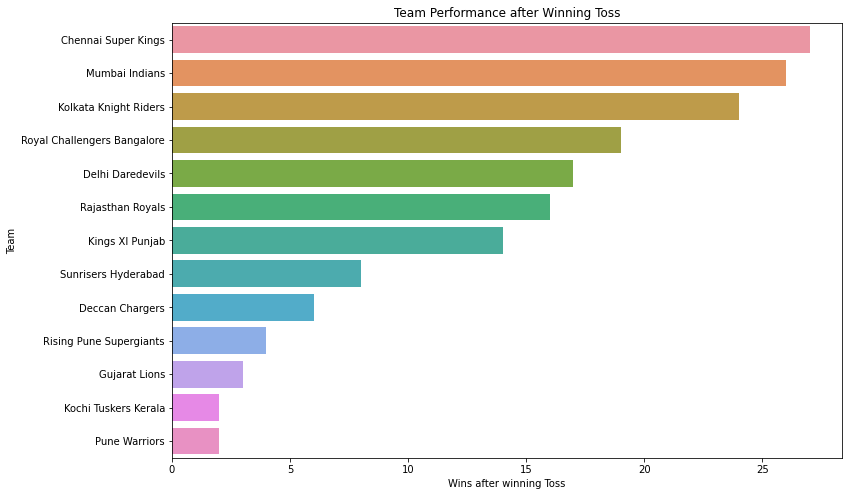

In [0]:
team_toss_win_performance_pd= team_toss_win_performance.toPandas()

#Plot
plt.figure(figsize=(12,8))
sns.barplot(x='wins_after_toss',y='team1', data= team_toss_win_performance_pd)
plt.title('Team Performance after Winning Toss')
plt.xlabel('Wins after winning Toss')
plt.ylabel('Team')
plt.show()